In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [39]:

def kd(p1: float, p2: float, delta: float = 0) -> float: 
    
    p2 = p2 - p1
    p1 = 0
    
    p1 = (p1 + 0.5) % 1 - 0.5
    p2 = (p2 + 0.5) % 1 - 0.5

    diff = p1 - p2
    c = np.sqrt(1 + 4*delta**2)

    if delta == 0:
        return c*0.5 * np.sign(diff) - diff

    return np.where(diff == 0, 0, 0.5 * c * diff / np.sqrt(diff**2 + delta**2 )- diff)

In [40]:
delta_in = 0.02
x0 = 1/16

x = np.linspace(0, 2, 1000)
no_reg = kd(x0, x, delta=0)
reg1 = kd(0, x, delta=delta_in)
reg2 = kd(0.5, x, delta=delta_in)
#reg3 = kd(2/3, x, delta=delta_in)

#error = np.abs(reg - no_reg)

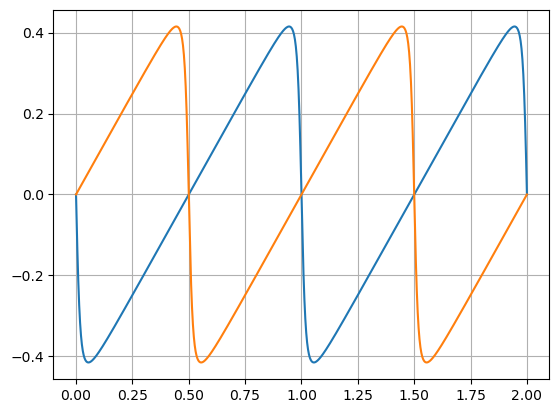

In [41]:
plt.plot(x, reg1)
plt.plot(x, reg2)
#plt.plot(x, reg3)
plt.grid()

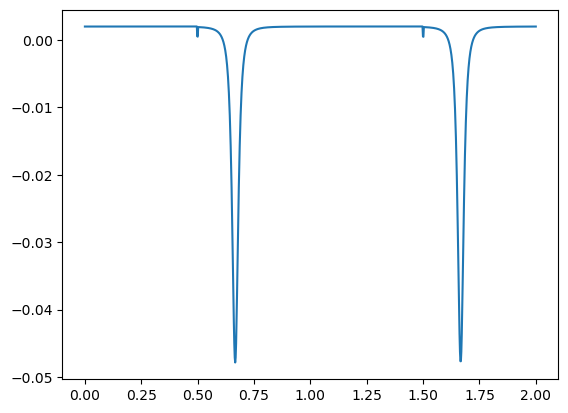

In [27]:
#plt.plot(x, np.gradient(reg1))
#plt.plot(x, np.gradient(reg2))
plt.plot(x, np.gradient(reg3))


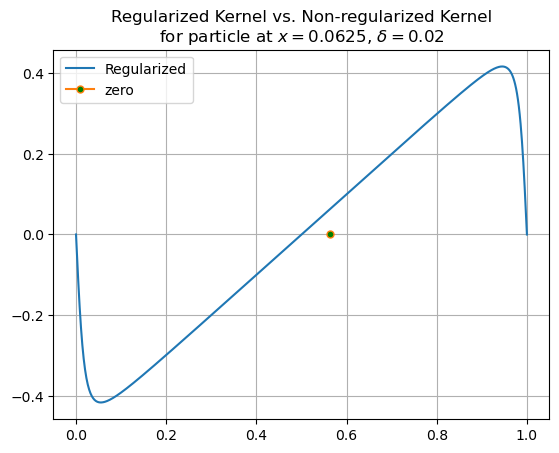

In [6]:
#plt.plot(x,no_reg, label="Not Regularized")
plt.plot(x, reg1, label="Regularized")
plt.grid()
plt.plot((x0 + 0.5) % 1, 0, marker="o", markersize=5, markerfacecolor="green", label = "zero")
plt.title(r'Regularized Kernel vs. Non-regularized Kernel' '\n' r'for particle at $x = {}$, $\delta = {}$'.format(x0, delta_in))
plt.legend()

In [7]:
""" plt.semilogy(x, error, label="Log Absolute Error")
plt.vlines(x0, 1e-9, 1, linestyles='--', colors='r', label="Reference Particle Position")
plt.grid()
plt.title(r'Log Absolute Error for $\delta = {}$ for particle at $x={}$'.format(delta_in, x0))
plt.legend()
plt.show() """

' plt.semilogy(x, error, label="Log Absolute Error")\nplt.vlines(x0, 1e-9, 1, linestyles=\'--\', colors=\'r\', label="Reference Particle Position")\nplt.grid()\nplt.title(r\'Log Absolute Error for $\\delta = {}$ for particle at $x={}$\'.format(delta_in, x0))\nplt.legend()\nplt.show() '

In [8]:
N = 4

pos = np.array([(i - 0.5)/N for i in range(1,N+1)])

diff_matrix = np.abs(pos[:, np.newaxis] - pos[np.newaxis, :])

total_potential = np.sum(np.triu(-0.5 * diff_matrix))

print(diff_matrix)
print(total_potential)


[[0.   0.25 0.5  0.75]
 [0.25 0.   0.25 0.5 ]
 [0.5  0.25 0.   0.25]
 [0.75 0.5  0.25 0.  ]]
-1.25


In [9]:
a = np.array([1,2,3,4])
w = np.linspace(0,3,4)
p = a[:, np.newaxis] * a[np.newaxis, :]
b = np.transpose(np.tile(a, (a.shape[0], 1)))
print(p)

[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]
